In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(0)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    max_tokens=5000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


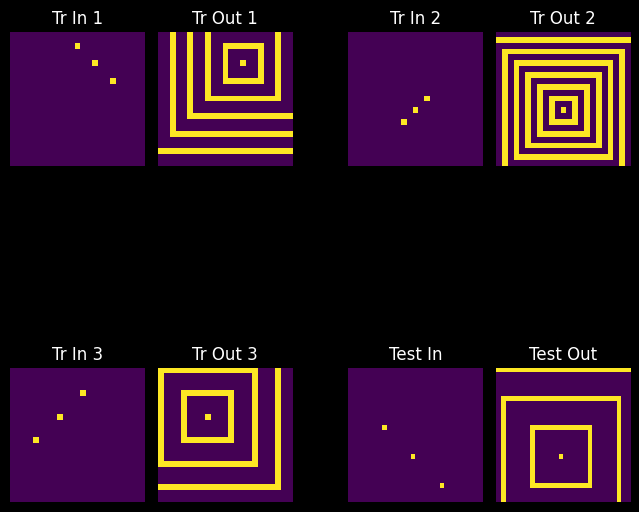

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLUFocus,MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer betwe
                    en 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the spatial 
                    transformation rules, logic, pattern and concept of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.4-focus.trail1",#"knowledge_base_v-0.6.trail1",#"knowledge_base_v-0.4-focus.trail1",
    compress_knowledge=False,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import (logic_concept_reasoning_network,
                            pattern_based_logical_reasoning_network)

reasoning_iterations=4
reasoning_agent=lambda prompt,input: pattern_based_logical_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)
# reasoning_agent=None
set_live_verbosity(0)

n = 100
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)


Starting Epoch 1



Training:   0%|          | 0/100 [00:00<?, ?it/s]Delete of nonexisting embedding ID: 1d3cfb49-4d7d-471a-9319-70fdf8dcdd24
Delete of nonexisting embedding ID: b94cc481-4d88-441e-85bc-133b31a8bf12
Delete of nonexisting embedding ID: 1b8af8a6-8ea1-4d5f-824b-7af1968b1d9b
Delete of nonexisting embedding ID: a73dcd85-8975-4259-95c1-d8d6fa9505d4
Delete of nonexisting embedding ID: f0889a72-f2e8-40a4-ad4a-3208a1dd077c
Delete of nonexisting embedding ID: 0b6103a7-e0fe-48c5-9cb6-2747fd19d36e
Delete of nonexisting embedding ID: 4d2cdc0c-7e72-4d55-9cab-84f12e25b409
Delete of nonexisting embedding ID: bf30e96b-7fd1-4c6a-8d78-3498701a6877
Delete of nonexisting embedding ID: c15125c1-6fa1-4855-aaa1-ae3424e08862
Delete of nonexisting embedding ID: cd38991e-3f5a-43e9-8bdf-90cb6b4d39d8
Delete of nonexisting embedding ID: c30fec99-103f-4398-aebc-01d77d7dbcc3
Delete of nonexisting embedding ID: 2c7a4816-3850-4654-b9e0-e6e693fff3a7
Delete of nonexisting embedding ID: e305117e-f52a-4067-b2a2-a56ae7c14035
De

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis


In [ ]:
mlu.print_knowledge_base()